In [1]:
import numpy as np

def cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    d = np.zeros(n)
    
    for i in range(n):
        # Diagonalelement von D
        d[i] = A[i, i] - np.sum(L[i, :i]**2 * d[:i])
        
        # Untere Dreieckselemente von L
        for j in range(i, n):
            L[j, i] = (A[j, i] - np.sum(L[j, :i] * L[i, :i] * d[:i])) / d[i]
    
    # Überschreibe die untere Dreiecksmatrix in A mit den Werten von L
    A[np.tril_indices(n)] = L[np.tril_indices(n)]
    
    return A, d


In [2]:
import scipy.linalg

def apply_cholesky_to_hilbert():
    results = []
    for n in range(2, 21):
        H = scipy.linalg.hilbert(n)
        L, d = cholesky(H.copy())
        results.append((H, L, d))
    return results

hilbert_results = apply_cholesky_to_hilbert()


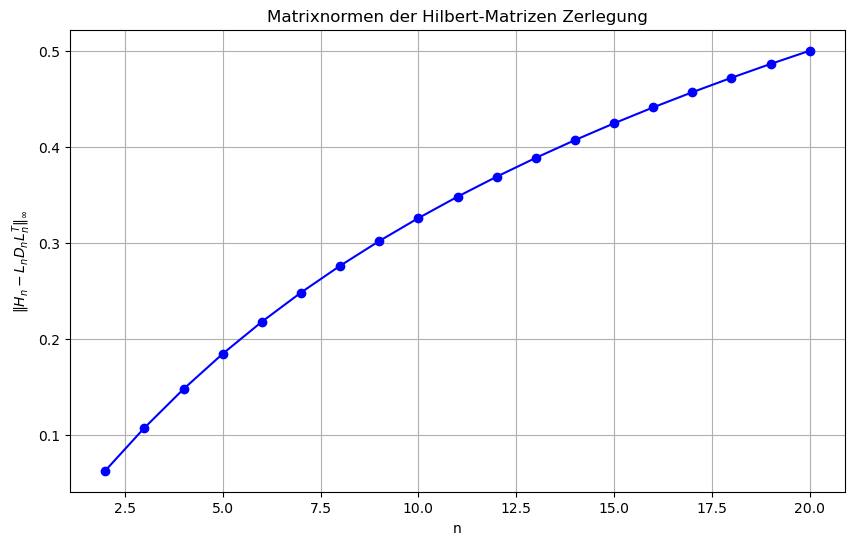

In [3]:
import matplotlib.pyplot as plt

def compute_norms(hilbert_results):
    norms = []
    for H, L, d in hilbert_results:
        D = np.diag(d)
        LDLT = L @ D @ L.T
        norm = np.linalg.norm(H - LDLT, np.inf)
        norms.append(norm)
    return norms

norms = compute_norms(hilbert_results)

# Plotten der Normen
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), norms, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel(r'$\|H_n - L_n D_n L^T_n\|_\infty$')
plt.title('Matrixnormen der Hilbert-Matrizen Zerlegung')
plt.grid(True)
plt.show()


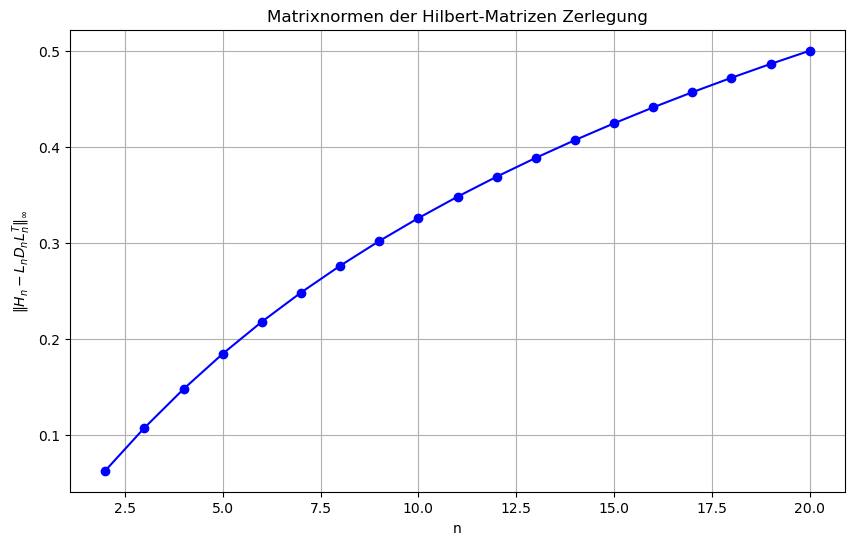

In [4]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

def cholesky(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    d = np.zeros(n)
    
    for i in range(n):
        d[i] = A[i, i] - np.sum(L[i, :i]**2 * d[:i])
        for j in range(i, n):
            L[j, i] = (A[j, i] - np.sum(L[j, :i] * L[i, :i] * d[:i])) / d[i]
    
    A[np.tril_indices(n)] = L[np.tril_indices(n)]
    
    return A, d

def apply_cholesky_to_hilbert():
    results = []
    for n in range(2, 21):
        H = scipy.linalg.hilbert(n)
        L, d = cholesky(H.copy())
        results.append((H, L, d))
    return results

hilbert_results = apply_cholesky_to_hilbert()

def compute_norms(hilbert_results):
    norms = []
    for H, L, d in hilbert_results:
        D = np.diag(d)
        LDLT = L @ D @ L.T
        norm = np.linalg.norm(H - LDLT, np.inf)
        norms.append(norm)
    return norms

norms = compute_norms(hilbert_results)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), norms, marker='o', linestyle='-', color='b')
plt.xlabel('n')
plt.ylabel(r'$\|H_n - L_n D_n L^T_n\|_\infty$')
plt.title('Matrixnormen der Hilbert-Matrizen Zerlegung')
plt.grid(True)
plt.show()
